In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

In [3]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

def lr_schedule(epoch):
    if epoch < 20:
        return 0.001
    else:
        return 0.0001
    
lr_scheduler_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

history_v1 = model.fit(train_images, train_labels, epochs=30, batch_size=64, validation_data=(test_images, test_labels), callbacks=[lr_scheduler_callback, early_stopping_callback])

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7019 - loss: 0.7889 - val_accuracy: 0.8569 - val_loss: 0.3860 - learning_rate: 0.0010
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8529 - loss: 0.4055 - val_accuracy: 0.8759 - val_loss: 0.3329 - learning_rate: 0.0010
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8708 - loss: 0.3447 - val_accuracy: 0.8890 - val_loss: 0.2985 - learning_rate: 0.0010
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8823 - loss: 0.3124 - val_accuracy: 0.8934 - val_loss: 0.2894 - learning_rate: 0.0010
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.8907 - loss: 0.2953 - val_accuracy: 0.8976 - val_loss: 0.2728 - learning_rate: 0.0010
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.8961 - loss: 0.2772 - val_accuracy: 0.9045 - val_loss: 0.2590 - learning_rate: 0.0010
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9006 - l

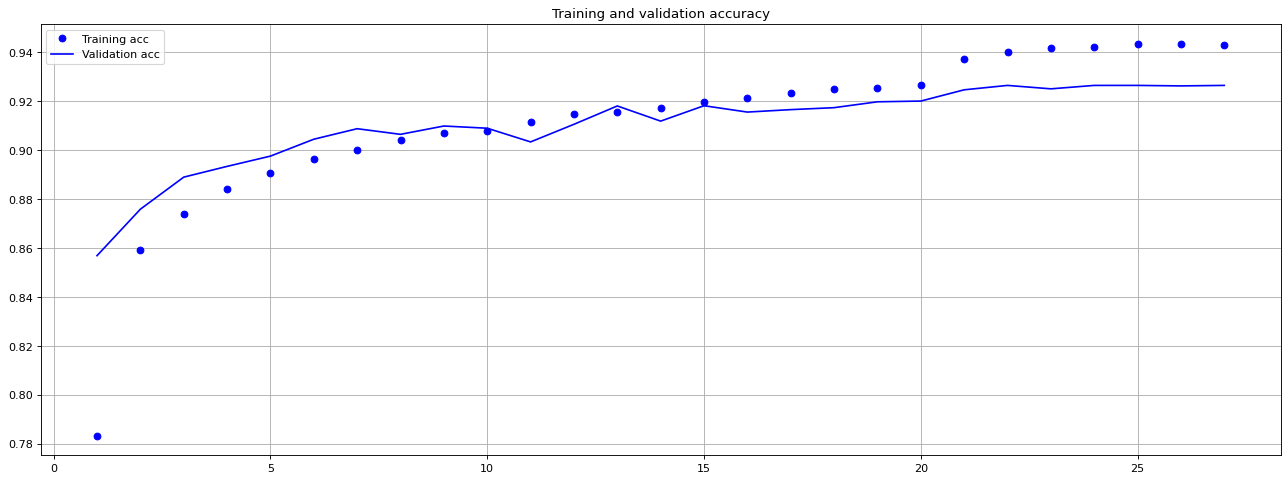

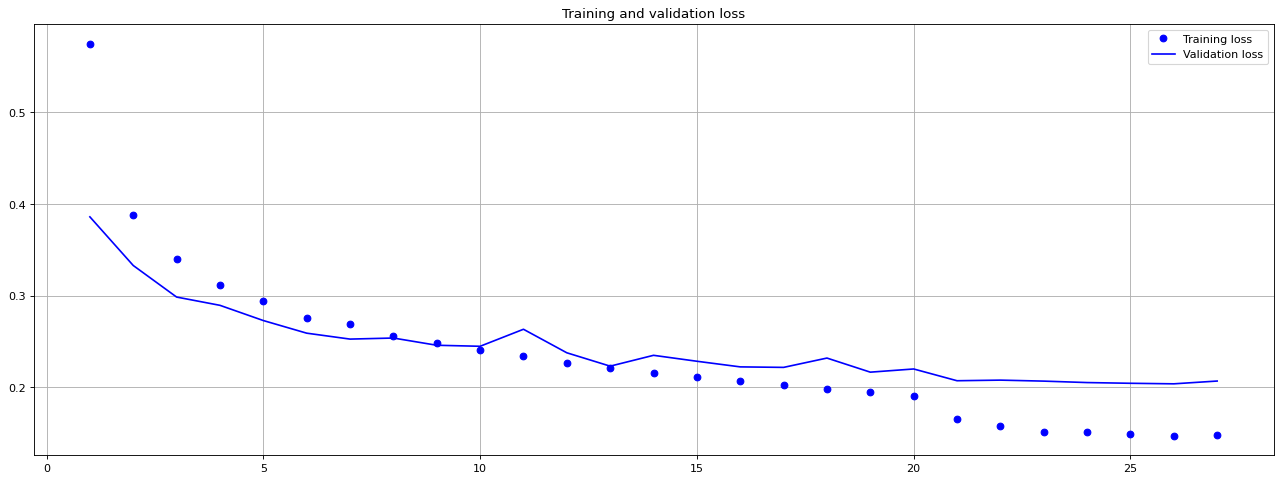

In [4]:
acc = history_v1.history["accuracy"]
val_acc = history_v1.history["val_accuracy"]

loss = history_v1.history["loss"]
val_loss = history_v1.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9245 - loss: 0.2175
Точність на тестових даних: 0.9265000224113464


In [6]:
train_images = tf.image.grayscale_to_rgb(tf.expand_dims(train_images, axis=-1))
train_images = tf.image.resize(train_images, (32, 32))

test_images = tf.image.grayscale_to_rgb(tf.expand_dims(test_images, axis=-1))
test_images = tf.image.resize(test_images, (32, 32))

vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model = tf.keras.Sequential([
   vgg16,
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(256, activation="relu"),
   tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history_v2 = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 770s 818ms/step - accuracy: 0.7926 - loss: 0.5716 - val_accuracy: 0.8835 - val_loss: 0.3322
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 756s 806ms/step - accuracy: 0.8877 - loss: 0.3113 - val_accuracy: 0.8907 - val_loss: 0.3107
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 773s 824ms/step - accuracy: 0.9003 - loss: 0.2689 - val_accuracy: 0.8983 - val_loss: 0.2884
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 751s 800ms/step - accuracy: 0.9082 - loss: 0.2496 - val_accuracy: 0.8919 - val_loss: 0.3265
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 752s 801ms/step - accuracy: 0.9133 - loss: 0.2384 - val_accuracy: 0.9027 - val_loss: 0.2986
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 750s 799ms/step - accuracy: 0.9184 - loss: 0.2266 - val_accuracy: 0.9015 - val_loss: 0.2931
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 752s 801ms/step - accuracy: 0.9224 - loss: 0.2102 - val_accuracy: 0.9027 - val_loss: 0.2888
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 746s 795ms/step - accuracy: 0.9251 -

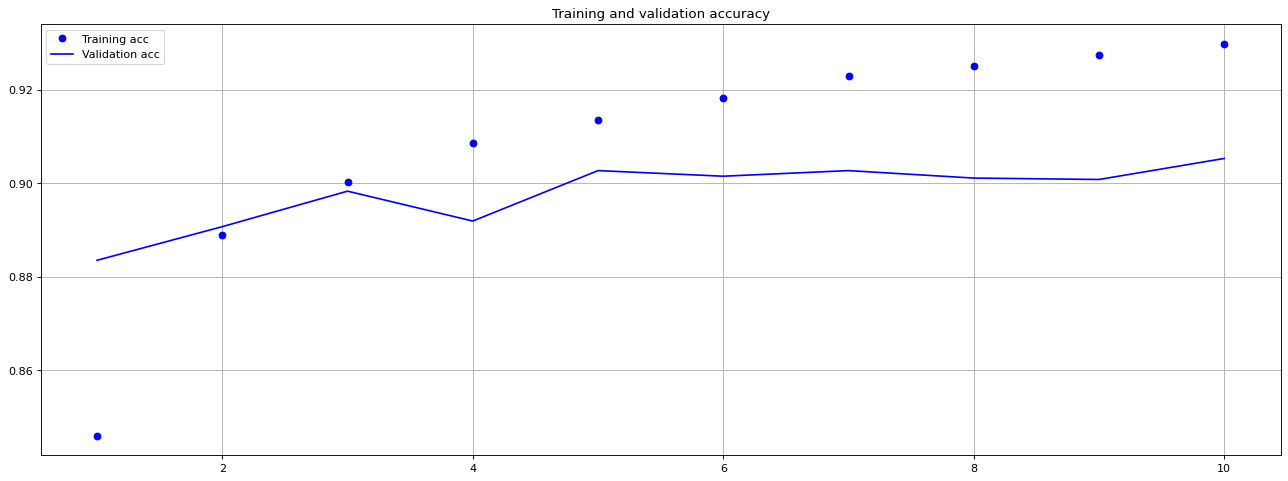

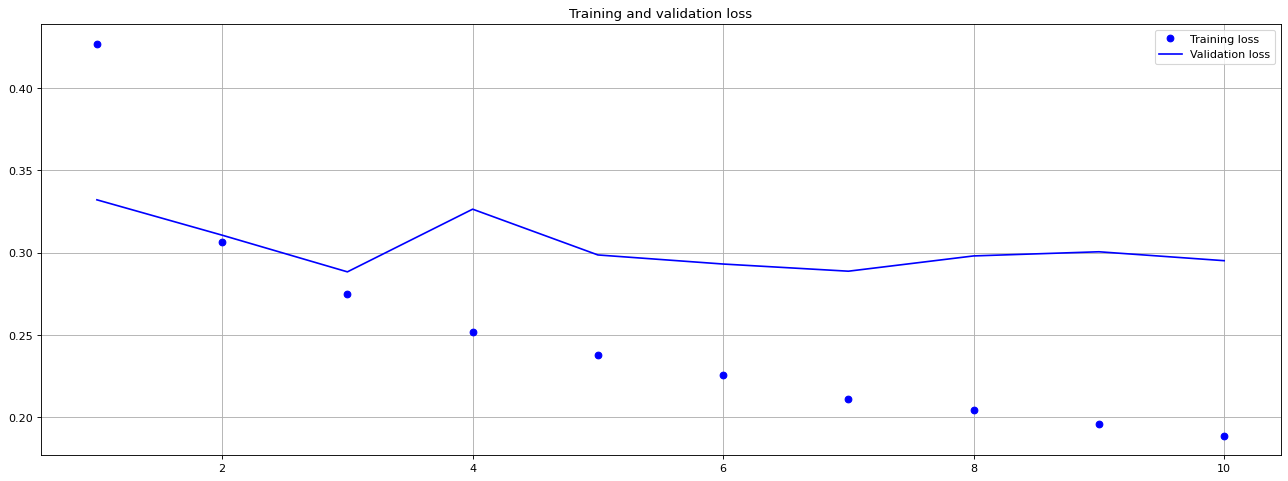

In [8]:
acc = history_v2.history["accuracy"]
val_acc = history_v2.history["val_accuracy"]

loss = history_v2.history["loss"]
val_loss = history_v2.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Точність на тестових даних:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - accuracy: 0.9015 - loss: 0.3104
Точність на тестових даних: 0.9053000211715698


### Висновок

Звичайна згорткова мережа показує кращі результати точності у порівнянні з багатошаровою мережею з попереднього завдання, також як ми можемо бачити звичайна згорткова мережа краще підходить під данне завдання ніж та, що використовує VGG16. Можна зробити висновок що VGG16 надто складна для такої задачі і ще й потребує більше розморожених шарів, а це не ефективно з боку витраченого часу на навчання такої мережі у порівнянні зі звичайною згортковою.